The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [1]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np

# Start coding here!
df = pd.read_csv("data/nobel.csv")
df.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country'],
      dtype='object')

In [2]:
# What is the most commonly awarded gender and birth country?
import pandas as pd

top_gender = df['sex'].value_counts().index[0]
top_country = df['birth_country'].value_counts().index[0]

top_gender, top_country

('Male', 'United States of America')

    decade    is_USA
0     1900  0.017544
1     1910  0.075000
2     1920  0.074074
3     1930  0.250000
4     1940  0.302326
5     1950  0.291667
6     1960  0.265823
7     1970  0.317308
8     1980  0.319588
9     1990  0.403846
10    2000  0.422764
11    2010  0.314050
12    2020  0.360000
The decade with the highest ratio of US-born Nobel Prize winners is: 2000


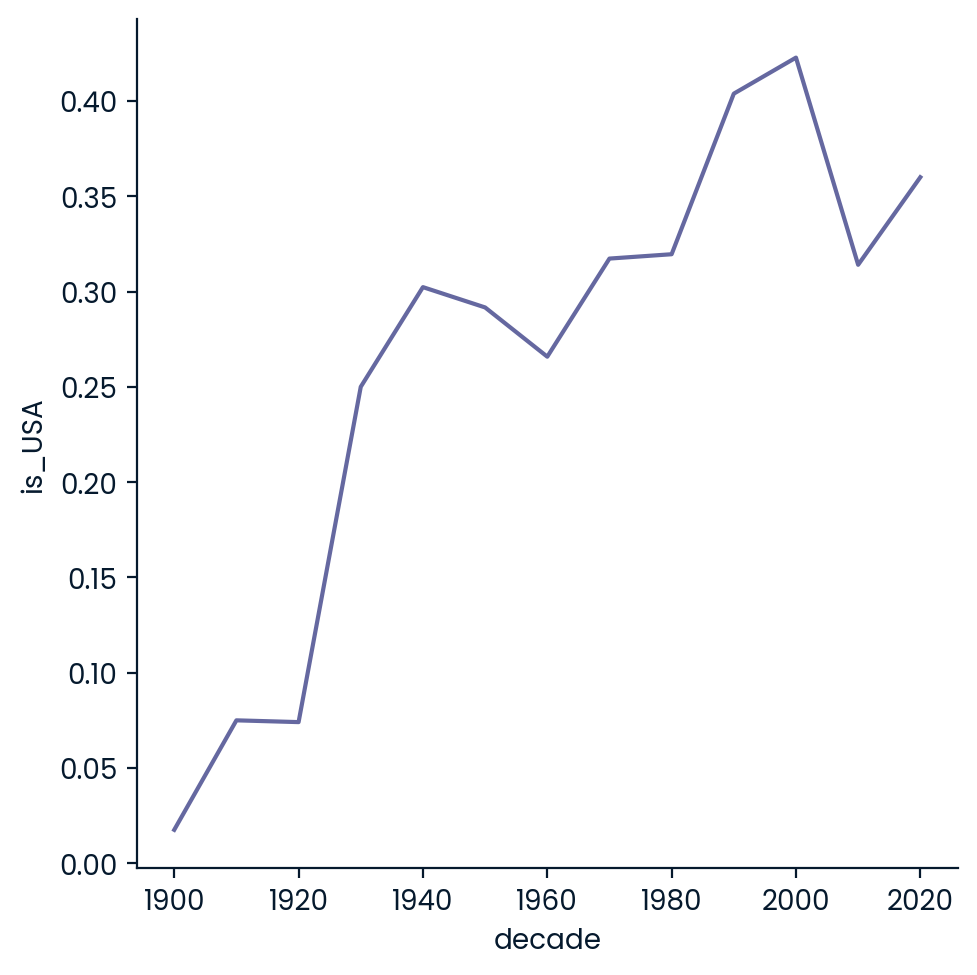

In [3]:
# Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?
import numpy as np
import seaborn as sns

df["is_USA"] = df["birth_country"] == 'United States of America'
df["decade"] = (np.floor(df["year"] / 10) * 10).astype(int)

# Group by decade and calculate the mean of is_USA
result = df.groupby("decade", as_index=False)["is_USA"].mean()

# Display the result
print(result)

max_decade_usa = result[result["is_USA"] == result["is_USA"].max()]["decade"].values[0]
print(f"The decade with the highest ratio of US-born Nobel Prize winners is: {max_decade_usa}")

sns.relplot(x="decade",
            y="is_USA",
            data=result,
            kind="line")

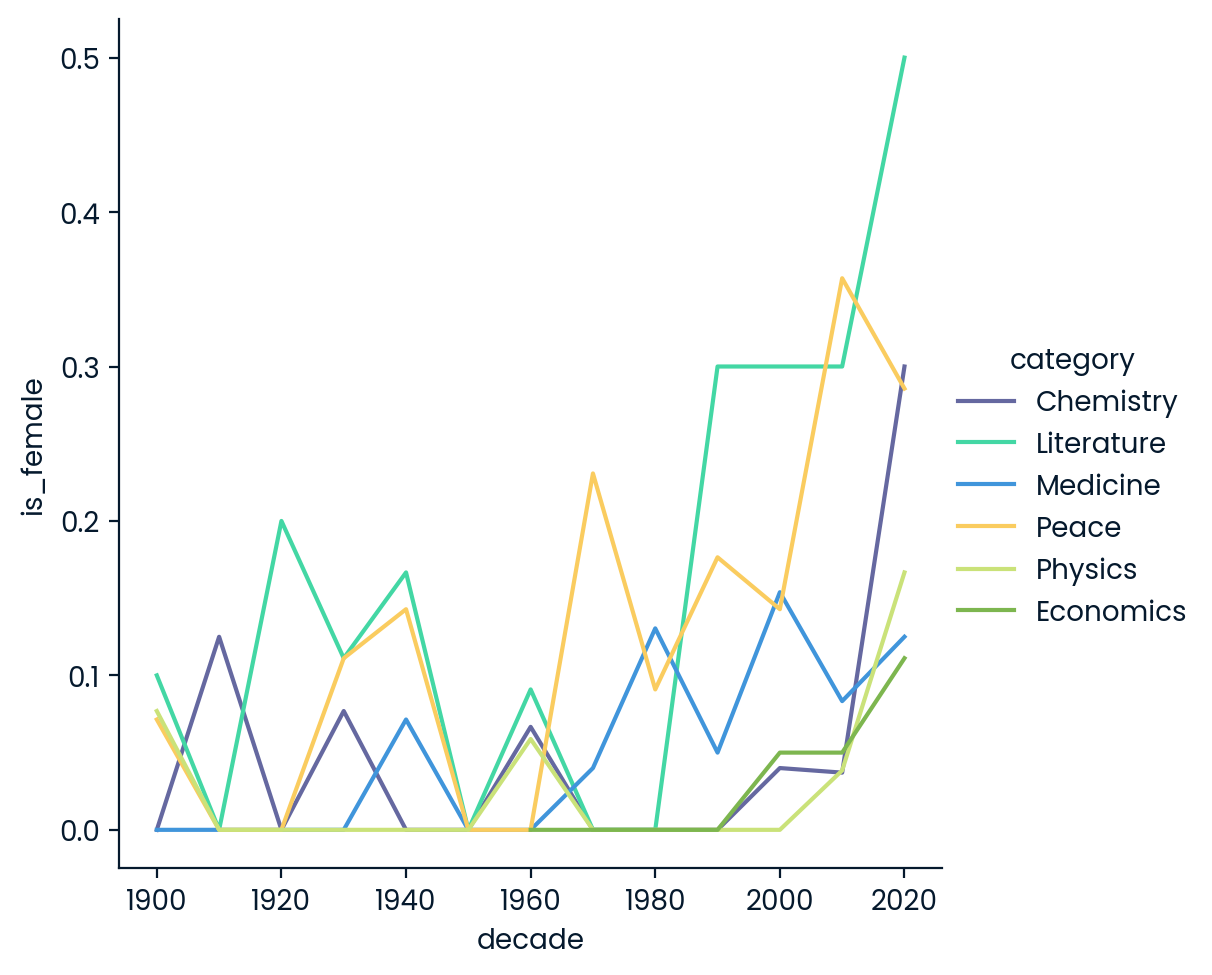

In [4]:
df["is_female"] = df["sex"] == 'Female'

# Group by decade and calculate the mean of is_USA
result = df.groupby(["decade", "category"], as_index=False)["is_female"].mean()

# decade and category with highest proportion of female laureates
max_female_decade_category = result[result['is_female'] == result['is_female'].max()][['decade', 'category']]
max_female_dict = {max_female_decade_category['decade'].values[0]: max_female_decade_category['category'].values[0]}

sns.relplot(x = "decade",
            y = "is_female",
            data = result,
            kind = "line",
            hue = "category")

In [7]:
# First woman to win a Nobel Prize
is_female = df[df["is_female"]]
min_row = is_female[is_female["year"] == is_female["year"].min()]
first_woman_name = min_row["full_name"].values[0]
first_woman_category = min_row["category"].values[0]

print(first_woman_name, first_woman_category)

Marie Curie, née Sklodowska Physics


In [8]:
# Repeat Winners
repeat_list = df["full_name"].value_counts()
repeat_list = repeat_list[repeat_list >= 2].index
repeat_list = list(repeat_list)

print(repeat_list)

['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']
